<center><h1><b>kNN - k nearest neighbors</b></h1></center>

<b>1. Divide the dataset as development and test. Because kNN does not require training you don’t have a train dataset. Make sure randomly divide the dataset</b>

In [69]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
#reading csv file
dataset = pd.read_csv('iris.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
#shuffling data and then divide into development and test set, as we can't use train_test_split
shuffle = dataset.sample(frac = 1).to_numpy()
size = int(0.70*len(dataset))
development_set = shuffle[:size]
test_set = shuffle[size:]
print("Size of Developement set: ",len(development_set))
print("Size of Test set: ",len(test_set))

Size of Developement set:  105
Size of Test set:  45


In [72]:
X_development = development_set[:,[0,1,2,3]]
X_test = test_set[:,[0,1,2,3]]
Y_development = development_set[:,-1]
Y_test = test_set[:,-1]

In [73]:
print("This is how X_development looks like after dividing into X and Y subsets: ")
print(X_development[:5])
print("\n")
print("This is how Y_development looks like after dividing into X and Y subsets: ")
print(Y_development[:5])

This is how X_development looks like after dividing into X and Y subsets: 
[[5.8 2.6 4.0 1.2]
 [5.1 2.5 3.0 1.1]
 [6.3 2.9 5.6 1.8]
 [4.6 3.2 1.4 0.2]
 [5.8 2.8 5.1 2.4]]


This is how Y_development looks like after dividing into X and Y subsets: 
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']


<b>2. Implement kNN using the following hyperparameters
    
    Number of neighbor K = 1,3,5,7
    distance metric
    euclidean distance
    normalized euclidean distance
    cosine similarity
</b>

In [74]:
#various distance metrics and accuracy function
def euclidean_distance(r1, r2):
    eu_distance = 0.0
    for i in range(len(r1)-1):
        eu_distance = eu_distance + np.square(r1[i] - r2[i])
    return sqrt(eu_distance)

def normalized_euclidean_distance(r1,r2):
    neu_distance = 0.0
    mean1 = r1[:len(r1)-1].mean()
    mean2 = r2[:len(r1)-1].mean()
    std1 = r1[:len(r1)-1].std()
    std2 = r2[:len(r1)-1].std()
    for i in range(len(r1)-1):    
        neu_distance = np.square((r1[i] - mean1/std1) - (r2[i] - mean2/std2))
    return sqrt(neu_distance)

def cosine_similarity(r1,r2):
    cosine_distance = 0.0
    a = 0
    b = 0
    for i in range(len(r1)-1):
        cosine_distance = cosine_distance + (r1[i] * r2[i])
        a = a + np.square(r1[i])
        b = b + np.square(r2[i])   
    cos_distance = cosine_distance/((np.sqrt(a)*(np.sqrt(b))))
    return (1-cos_distance)

def calculate_accuracy(expected, predicted):
    counter = 0
    r = len(expected)
    for i in range(r):
        if(expected[i]==predicted[i]):
            counter = counter + 1
    acc = (counter*100)/r
    return acc

In [75]:
#euclidean neighbour
def get_kNN_euclidean(development_set,X_development_row, k):
    distance = []
    for row in development_set:
        temp_distance = euclidean_distance(row ,X_development_row)
        distance.append((row,temp_distance))
    distance.sort(key=lambda tup: tup[1])
    neighbour = []
    for i in range(k):
        neighbour.append(distance[i][0])
    class_value=[]
    for row in neighbour:
        class_value.append(row[-1])
    class_prediction = max(set(class_value), key=class_value.count)
    return class_prediction

In [76]:
#normalized euclidean neighbour
def get_kNN_normalized_euclidean(development_set,X_development_row, k):
    distance = []
    for row in development_set:
        temp_distance = normalized_euclidean_distance(row ,X_development_row)
        distance.append((row,temp_distance))
    distance.sort(key=lambda tup: tup[1])
    neighbour = []
    for i in range(k):
        neighbour.append(distance[i][0])
    class_value=[]
    for row in neighbour:
        class_value.append(row[-1])
    class_prediction = max(set(class_value), key=class_value.count)
    return class_prediction

In [77]:
#cosine similarity neighbour
def get_kNN_cosine(development_set,X_development_row, k):
    distance = []
    for row in development_set:
        temp_distance = cosine_similarity(row ,X_development_row)
        distance.append((row,temp_distance))
    distance.sort(key=lambda tup:tup[1])
    neighbour = []
    for i in range(k):
        neighbour.append(distance[i][0])
    class_value=[]
    for row in neighbour:
        class_value.append(row[-1])
    class_prediction = max(set(class_value), key=class_value.count)
    return class_prediction

<b> 3. Using the development dataset,
    
    Calculate accuracy by iterating all of the development data point
    Find optimal hyperparameters
    Draw bar charts for accuracy
</b>

In [78]:
#calculating accuracies for different K values
#accuracy for euclidean distance
k = [1,3,5,7]
acc_euclidean = []
for i in range(len(k)):
    predictions = []
    for row in X_development:
        predictions.append(get_kNN_euclidean(development_set, row, k[i]))
    aeuclidean=calculate_accuracy(Y_development, predictions)
    acc_euclidean.append(aeuclidean)

#accuracy for normalized euclidean distance
k = [1,3,5,7]
acc_normalized = []
for i in range(len(k)):
    predictions = []
    for row in X_development:
        predictions.append(get_kNN_normalized_euclidean(development_set, row, k[i]))
    anormalized = calculate_accuracy(Y_development, predictions)
    acc_normalized.append(anormalized)

#accuracy for cosine similarity
k = [1,3,5,7]
acc_cosine = []
for i in range(len(k)):
    predictions = []
    for row in X_development:
        predictions.append(get_kNN_cosine(development_set, row, k[i]))
    acosine = (calculate_accuracy(Y_development, predictions))
    acc_cosine.append(acosine)

#printing all accuracies
print("Predictions for various k-values for Euclidean Distance:")
for i in range(len(k)):
    print("Accuracy for value of k = " ,k[i],":", acc_euclidean[i])
print("\n")
print("Predictions for various k-values for Normalized Euclidean Distance:")
for i in range(len(k)):
    print("Accuracy for value of k = " ,k[i],":", acc_normalized[i])
print("\n")
print("Predictions for various k-values for Cosine Similarity:")
for i in range(len(k)):
    print("Accuracy for value of k = " ,k[i],":", acc_cosine[i])

Predictions for various k-values for Euclidean Distance:
Accuracy for value of k =  1 : 100.0
Accuracy for value of k =  3 : 97.14285714285714
Accuracy for value of k =  5 : 98.0952380952381
Accuracy for value of k =  7 : 97.14285714285714


Predictions for various k-values for Normalized Euclidean Distance:
Accuracy for value of k =  1 : 100.0
Accuracy for value of k =  3 : 93.33333333333333
Accuracy for value of k =  5 : 93.33333333333333
Accuracy for value of k =  7 : 92.38095238095238


Predictions for various k-values for Cosine Similarity:
Accuracy for value of k =  1 : 100.0
Accuracy for value of k =  3 : 98.0952380952381
Accuracy for value of k =  5 : 99.04761904761905
Accuracy for value of k =  7 : 99.04761904761905


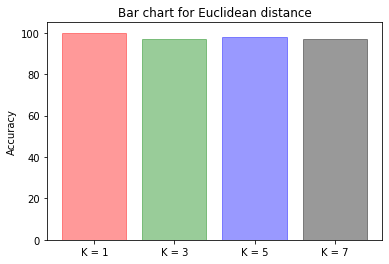

In [79]:
#bar chart for euclidean distance
objects = ['K = 1','K = 3','K = 5','K = 7']
plt.title('Bar chart for Euclidean distance')
plt.ylabel('Accuracy')
graph = plt.bar(objects, acc_euclidean, align = 'center', alpha = 0.4)
graph[0].set_color('r')
graph[1].set_color('g')
graph[2].set_color('b')
graph[3].set_color('k')
plt.show()

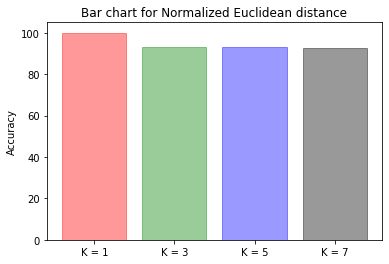

In [80]:
#Bar chart for Normalized Euclidean distance
objects = ['K = 1','K = 3','K = 5','K = 7']
plt.title('Bar chart for Normalized Euclidean distance')
plt.ylabel('Accuracy')
graph = plt.bar(objects, acc_normalized, align = 'center', alpha = 0.4)
graph[0].set_color('r')
graph[1].set_color('g')
graph[2].set_color('b')
graph[3].set_color('k')
plt.show()

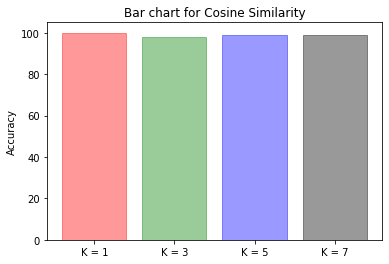

In [81]:
#Bar chart for Cosine Similarity
objects = ['K = 1','K = 3','K = 5','K = 7']
plt.title('Bar chart for Cosine Similarity')
plt.ylabel('Accuracy')
graph = plt.bar(objects, acc_cosine, align = 'center', alpha = 0.4)
graph[0].set_color('r')
graph[1].set_color('g')
graph[2].set_color('b')
graph[3].set_color('k')
plt.show()

<b>4. Using the test dataset
    
    Use the optimal hyperparameters you found in the step c, and use it to calculate the final accuracy. 
</b>

In [82]:
print("Final test accuracy for Cosine Similarity distance and K = 1")
predictions = []
for row in test_set:
    predictions.append(get_kNN_cosine(development_set, row, 1))
acosine = (calculate_accuracy(Y_test, predictions))
print(acosine)

Final test accuracy for Cosine Similarity distance and K = 1
97.77777777777777


<b>References:</b>
1. kNN code concepts: https://machinelearningmastery.com/load-machine-learning-data-scratch-python/
2. Bar chart: https://pythonspot.com/matplotlib-bar-chart/
3. code reference: https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711
4. https://www.geeksforgeeks.org/reading-writing-text-files-python/
5. Cosine similarity : https://github.com/sagarmk/Cosine-similarity-from-scratch-on-webpages/blob/master/cosine_similarity.py
6. Euclidean distance: https://pythonprogramming.net/euclidean-distance-machine-learning-tutorial/
7. Splitting data: http://cs230.stanford.edu/blog/split/